# <center> Images to Numpy Arrays </center>

__Date:__ June 25, 2019

***

__Packages:__ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2 

import os

import json
import PIL as PIL

***

In [2]:
image_name = 'FeNjB1RoVbZxTRxddaxIqQ'
image_path = '/home/cpf/Desktop/mtsd_fully_annotated/images/'
annot_path = '/home/cpf/Desktop/mtsd_fully_annotated/annotations/'

In [3]:
image = PIL.Image.open(image_path + image_name + ".jpg")
image_data = np.asarray(image)
print(image_data.shape)

(768, 1280, 3)


In [4]:
json_file = open(annot_path + image_name + '.json')
data = json.load(json_file)
json_file.close()

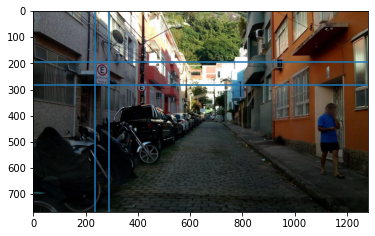

In [5]:
number_box = 3

plt.imshow(image_data)

plt.axvline(data['objects'][number_box]['bbox']['xmin'])
plt.axvline(data['objects'][number_box]['bbox']['xmax'])
plt.axhline(data['objects'][number_box]['bbox']['ymin'])
plt.axhline(data['objects'][number_box]['bbox']['ymax'])

plt.show()

In [6]:
print(len(data['objects']))
print(data['objects'][0]['label'])#['properties'])

4
information--parking--g3


In [7]:
print("number of data: ", len(os.listdir(annot_path)))

number of data:  41909


## SORTING THE DATA

### creating an overview dic

In [8]:
data_files = os.listdir(annot_path)

In [9]:
overview_dic = {}

In [ ]:
for annot_name in tqdm(data_files):
    json_file = open(annot_path + annot_name)
    data = json.load(json_file)
    json_file.close()
    
    for j in range(len(data['objects'])):
        if data['objects'][j]['label'] in overview_dic:
            overview_dic[data['objects'][j]['label']] += 1
        else:
            overview_dic[data['objects'][j]['label']] = 1


In [ ]:
overview_dic

### Creating list only from this sign

In [10]:
sign = 'regulatory--stop--g1'

name_list = []
x_min_list = []
x_max_list = []
y_min_list = []
y_max_list = []
height_list = []
width_list = []

In [11]:
for annot_name in tqdm(data_files):
    json_file = open(annot_path + annot_name)
    data = json.load(json_file)
    json_file.close()
    
    for j in range(len(data['objects'])):
        if data['objects'][j]['label'] == sign:
            name_list += [annot_name]
            x_min_list += [data['objects'][j]['bbox']['xmin']]
            x_max_list += [data['objects'][j]['bbox']['xmax']]
            y_min_list += [data['objects'][j]['bbox']['ymin']]
            y_max_list += [data['objects'][j]['bbox']['ymax']]
            height_list += [data["height"]]
            width_list += [data["width"]]

100%|██████████| 41909/41909 [00:02<00:00, 14527.15it/s]


In [12]:
name_array = np.asarray(name_list)
x_min_array = np.asarray(x_min_list)
x_max_array = np.asarray(x_max_list)
y_min_array = np.asarray(y_min_list)
y_max_array = np.asarray(y_max_list)
height_array = np.asarray(height_list)
width_array = np.asarray(width_list)

### Testing the created data

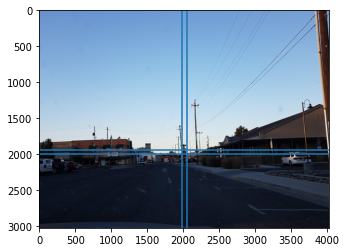

In [13]:
image_number = 7

image = PIL.Image.open(image_path + name_array[image_number][:-5] + ".jpg")
image_data = np.asarray(image)

plt.imshow(image_data)

plt.axvline(x_min_array[image_number])
plt.axvline(x_max_array[image_number])
plt.axhline(y_min_array[image_number])
plt.axhline(y_max_array[image_number])

plt.show()

### Checking Image sizes

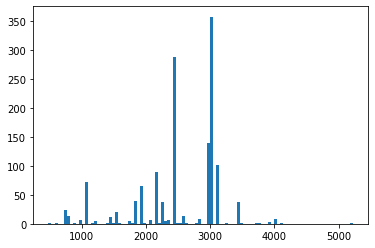

In [14]:
plt.hist(height_array, bins = 100)
plt.show()

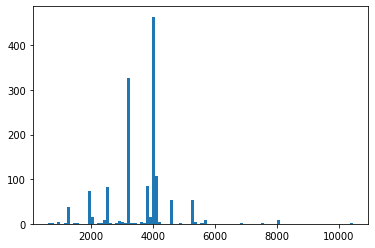

In [15]:
plt.hist(width_array, bins = 100)
plt.show()

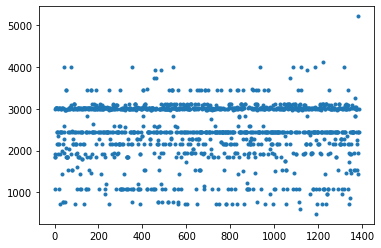

In [16]:
plt.plot(np.arange(height_array.size),height_array , ".")
plt.show()

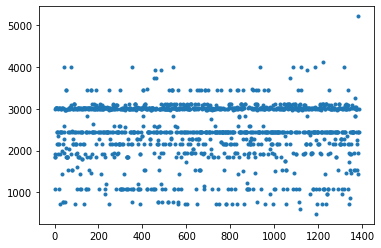

In [17]:
plt.plot(np.arange(width_array.size),height_array , ".")
plt.show()

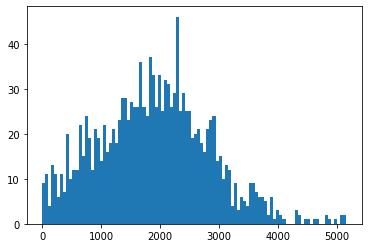

In [18]:
plt.hist(x_min_array, bins = 100)
plt.show()

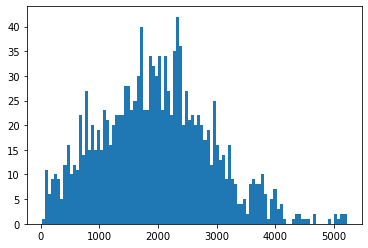

In [19]:
plt.hist(x_max_array, bins = 100)
plt.show()

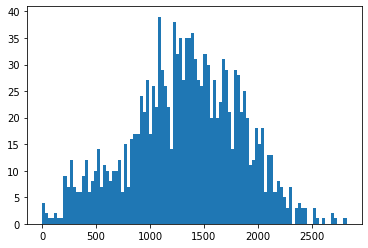

In [20]:
plt.hist(y_min_array, bins = 100)
plt.show()

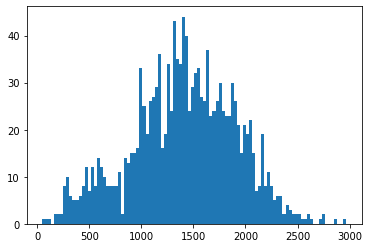

In [21]:
plt.hist(y_max_array, bins = 100)
plt.show()

### Cutting the Images in the Right Size
-> Shape 500 x 500


name_array = np.asarray(name_list)
x_min_array = np.asarray(x_min_list)
x_max_array = np.asarray(x_max_list)
y_min_array = np.asarray(y_min_list)
y_max_array = np.asarray(y_max_list)
height_array = np.asarray(height_list)
width_array = np.asarray(width_list)

In [143]:
def image_cropper(image_number, outcome_size=500): 
    
    problem = False
    
    xmin = x_min_array[image_number] 
    ymin = y_min_array[image_number]
    xmax = x_max_array[image_number]
    ymax = y_max_array[image_number]

    if xmax - xmin > outcome_size:
        #print("Traffic Sign too big X")
        problem = True
    if ymax - ymin > outcome_size:
        #print("Traffic Sign too big Y")
        problem = True
        
    x_random = np.random.choice(np.arange(50,100))
    y_random = np.random.choice(np.arange(50,100))

    if xmin < x_random:
        #print("Not enough space X")
        problem = True
    if ymin < y_random:
        #print("Not enough space Y")
        problem = True
        
    x1 = xmin - x_random
    y1 = ymin - y_random

    x2 = x1 + outcome_size
    y2 = y1 + outcome_size

    image = PIL.Image.open(image_path + name_array[image_number][:-5] + ".jpg")

    image_croped = image.crop((x1, y1, x2, y2))

    x_end = xmax - xmin + x_random
    y_end = ymax - ymin + y_random
    
    return np.asarray(image_croped), x_random, x_end, y_random, y_end, problem

In [144]:
im, xstart, xend, ystart, yend, problem = image_cropper(2, 300)

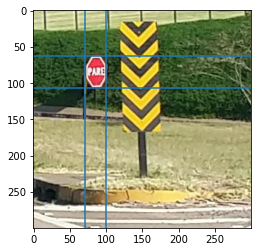

In [145]:
plt.imshow(im)
plt.axvline(xstart)
plt.axvline(xend)
plt.axhline(ystart)
plt.axhline(yend)
plt.show()

### store this data

In [146]:
dir_name = "/home/cpf/Desktop/processed_traffic_data"

if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
sign = 'regulatory--stop--g1'

In [140]:
name_list = []
x_min_list = []
x_max_list = []
y_min_list = []
y_max_list = []
height_list = []
width_list = []

for annot_name in tqdm(data_files):
    json_file = open(annot_path + annot_name)
    data = json.load(json_file)
    json_file.close()
    
    for j in range(len(data['objects'])):
        if data['objects'][j]['label'] == sign:
            name_list += [annot_name]
            x_min_list += [data['objects'][j]['bbox']['xmin']]
            x_max_list += [data['objects'][j]['bbox']['xmax']]
            y_min_list += [data['objects'][j]['bbox']['ymin']]
            y_max_list += [data['objects'][j]['bbox']['ymax']]
            height_list += [data["height"]]
            width_list += [data["width"]]
            
name_array = np.asarray(name_list)
x_min_array = np.asarray(x_min_list)
x_max_array = np.asarray(x_max_list)
y_min_array = np.asarray(y_min_list)
y_max_array = np.asarray(y_max_list)
height_array = np.asarray(height_list)
width_array = np.asarray(width_list)

100%|██████████| 41909/41909 [00:16<00:00, 2488.44it/s]


In [147]:
name_counter = 0
for i in tqdm(range(len(name_array))):
    im, xstart, xend, ystart, yend, problem = image_cropper(i, 300)
    values = np.array([xstart, xend, ystart, yend])
    if problem == False:
        np.save(dir_name + "/image_" + str(name_counter), im)
        np.save(dir_name + "/values_" + str(name_counter), values)
        name_counter += 1


 14%|█▍        | 191/1387 [00:26<02:47,  7.12it/s]


 27%|██▋       | 374/1387 [00:53<02:23,  7.04it/s]


 40%|████      | 557/1387 [01:24<02:06,  6.58it/s]


 53%|█████▎    | 739/1387 [01:52<01:38,  6.57it/s]


 66%|██████▋   | 919/1387 [02:21<01:11,  6.51it/s]


 79%|███████▉  | 1096/1387 [02:47<00:44,  6.54it/s]


 92%|█████████▏| 1277/1387 [03:13<00:16,  6.61it/s]


100%|██████████| 1387/1387 [03:29<00:00,  6.63it/s]


### test the data

In [150]:
t = np.load(dir_name + "/image_" + str(1) + ".npy")

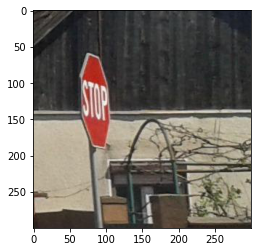

In [151]:
plt.imshow(t)